<a href="https://colab.research.google.com/github/natalia-maler/Classification-Regression-Data-Analysis-Projects/blob/main/Projekt2_3(regresja).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESJA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Pokazanie wszystkich kolumn w jednym wierszu
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [ ]:
# wczytanie danych
data = pd.read_csv('data.csv')

print(data.head())
print(data.info())

   Age  City_Tier Education         Sector Marital_Status  Dependents    Income      Rent  Groceries  Transport  Healthcare  Entertainment  Loan_Repayment  Savings_Goal  Potential_Savings
0   22          3        HS         Retail         Single           1  13770.50   3018.06    1730.99     966.41      792.45        1034.01            0.00       2391.27            6228.57
1   55          3  Bachelor  Manufacturing         Single           0  36753.63  10421.89    2567.12    3167.29         NaN        1873.98         4838.20       5529.53           12803.02
2   49          1       PhD     Healthcare        Married           2  69990.94  19913.46    8871.08    3554.88     1741.72        1863.42            0.00      11611.16           34046.38
3   39          1        HS             IT         Single           0  38720.32   9890.31    2186.69    1799.49     2139.95        1679.39         3167.76       5002.30           17856.73
4   38          2        HS     Healthcare         Single   

##Wyjaśnienie kolumn ze zbioru Data
Zbiór danych zawiera informacje demograficzne oraz finansowe gospodarstw domowych. Każdy wiersz odpowiada jednej osobie, natomiast kolumny opisują ich cechy społeczno-ekonomiczne oraz wydatki.

Kolumna:
- Age -  wiek osoby
- City_Tier - kategoria miasta, w któym mieszka dana osoba, 1-duże miasto, 2-średnie, 3-małe
- Education - poziom wykształcenia
- Sector - sektor zatrudnienia osoby
- Marital_Status - stan cywilny osoby
- Dependents - liczba pozostająca na utrzymaniu, np. dzieci
- Income - miesięczny dochód osoby lub gospodarstwa domowego
- Rent - miesięczne wydatki na wynajem mieszkania
- Groceries - wydatki na artykuły spożywcze
- Transport - koszty transportu
- Healthcare - wydatki na opiekę zdrowotną
- Entertainment - wydatki na rozrywkę
- Loan_Repayment - kwota spłaty pożyczki
- Savings_Goal - planowany cel oszczędnościowy
- Potential_Savings - szacowana kwota oszczędności, jaką dana osoba mogłaby odłożyć

In [ ]:
# analiza braków danych
print("Analiza braków danych:")
print(data.isnull().sum())

Analiza braków danych:
Age                    0
City_Tier              0
Education            363
Sector               400
Marital_Status         0
Dependents             0
Income                 0
Rent                 407
Groceries              0
Transport              0
Healthcare           391
Entertainment          0
Loan_Repayment       402
Savings_Goal           0
Potential_Savings      0
dtype: int64


In [ ]:
# uzupełnienie braków
numeric_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns
print("Kolumny kategoryczne:",categorical_cols)

# kolumny numeryczne - śrenia, kategoryczne - najczęstsza wartość
for col in numeric_cols:
  data[col] = data[col].fillna(data[col].median())

for col in categorical_cols:
  data[col] = data[col].fillna(data[col].mode()[0])

print("\nPo uzupełnieniu:")
print(data.isnull().sum())

print("\nKolumny po uzupełnieniu:")
data.head()

Kolumny kategoryczne: Index(['Education', 'Sector', 'Marital_Status'], dtype='object')

Po uzupełnieniu:
Age                  0
City_Tier            0
Education            0
Sector               0
Marital_Status       0
Dependents           0
Income               0
Rent                 0
Groceries            0
Transport            0
Healthcare           0
Entertainment        0
Loan_Repayment       0
Savings_Goal         0
Potential_Savings    0
dtype: int64

Kolumny po uzupełnieniu:


,Age,City_Tier,Education,Sector,Marital_Status,Dependents,Income,Rent,Groceries,Transport,Healthcare,Entertainment,Loan_Repayment,Savings_Goal,Potential_Savings
0,22,3,HS,Retail,Single,1,13770.50,3018.06,1730.99,966.41,792.45,1034.01,0.00,2391.27,6228.57
1,55,3,Bachelor,Manufacturing,Single,0,36753.63,10421.89,2567.12,3167.29,1379.75,1873.98,4838.20,5529.53,12803.02
2,49,1,PhD,Healthcare,Married,2,69990.94,19913.46,8871.08,3554.88,1741.72,1863.42,0.00,11611.16,34046.38
3,39,1,HS,IT,Single,0,38720.32,9890.31,2186.69,1799.49,2139.95,1679.39,3167.76,5002.30,17856.73
4,38,2,HS,Healthcare,Single,4,30723.43,6653.45,3342.27,1302.85,1776.34,587.80,0.00,2879.97,17060.72


# 2. Zbadanie rozkładu zmiennej Income

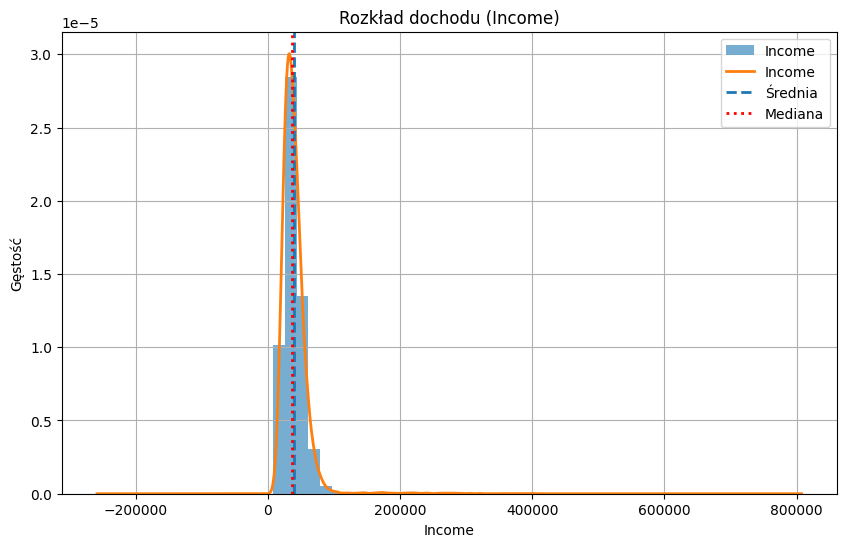

In [ ]:
plt.figure(figsize=(10,6))
data["Income"].plot(kind="hist",bins=30,density=True,alpha=0.6)
data["Income"].plot(kind="kde", linewidth=2)
plt.axvline(data["Income"].mean(), linestyle="--", linewidth=2, label="Średnia")
plt.axvline(data["Income"].median(), linestyle=":", linewidth=2, label="Mediana",color='r')
plt.title("Rozkład dochodu (Income)")
plt.xlabel("Income")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.show()

# Histogram przedstawia rozkład zmiennej Income, czyli częstotliwość występowania określonych poziomów dochodu w zbiorze danych.

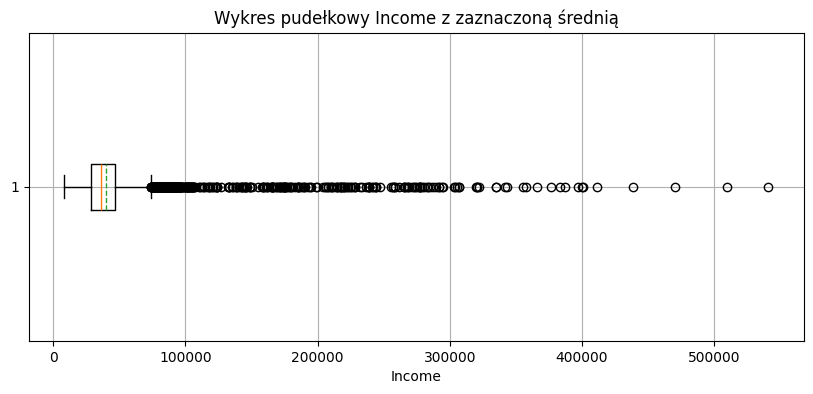

In [ ]:
plt.figure(figsize=(10,4))
plt.boxplot(data["Income"],vert=False,showmeans=True,meanline=True)
plt.title("Wykres pudełkowy Income z zaznaczoną średnią")
plt.xlabel("Income")
plt.grid(True)
plt.show()

# Na wykresie pudełkowym przedstawiono rozkład zmiennej Income wraz z zaznaczoną średnią.

## 3. Identyfikacja wartości odstających w Income metodą IQR

In [ ]:
# wartości odstające

Q1 = data["Income"].quantile(0.25)
Q3 = data["Income"].quantile(0.75)
IQR = Q3 - Q1

dolna_granica = Q1 - 1.5 * IQR
gorna_granica = Q3 + 1.5 * IQR

data["Income_Outlier"] = np.where((data["Income"] < dolna_granica) | (data["Income"] > gorna_granica),1,0)

print("Dolna granica IQR:", dolna_granica)
print("Górna granica IQR:", gorna_granica)
print("Liczba wartości odstających:", data["Income_Outlier"].sum())

print("\nStatystyki Income – przed:")
print(data["Income"].describe())

# dane, które zawierają wartości nieodstające
data_no_outliers = data[data["Income_Outlier"] == 0]

print("\nStatystyki Income – po usunięciu odstających:")
print(data_no_outliers["Income"].describe())

Dolna granica IQR: 675.3762499999975
Górna granica IQR: 74162.46625
Liczba wartości odstających: 571

Statystyki Income – przed:
count     20000.000000
mean      40016.681768
std       23782.207199
min        8000.000000
25%       28233.035000
50%       36391.145000
75%       46604.807500
max      541028.280000
Name: Income, dtype: float64

Statystyki Income – po usunięciu odstających:
count    19429.000000
mean     37428.704619
std      12666.071639
min       8000.000000
25%      28025.180000
50%      35973.510000
75%      45500.790000
max      74057.920000
Name: Income, dtype: float64


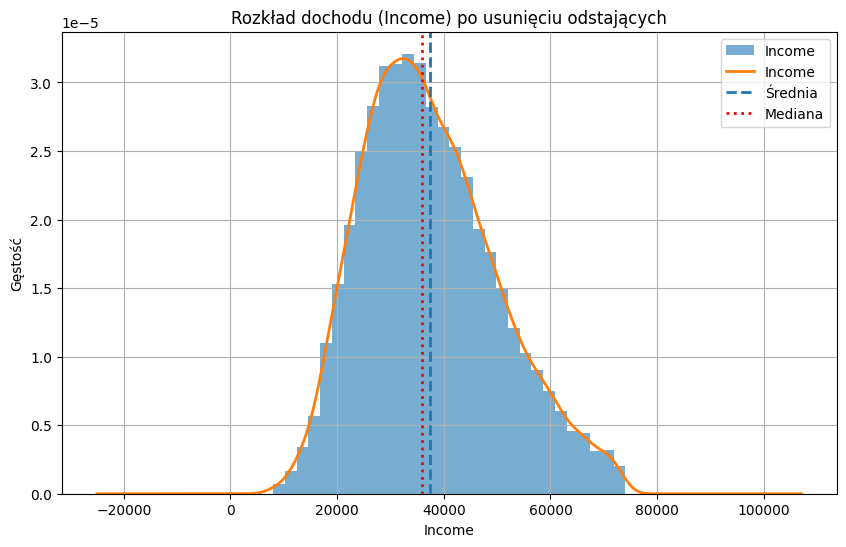

In [ ]:
plt.figure(figsize=(10,6))
data_no_outliers["Income"].plot(kind="hist",bins=30,density=True,alpha=0.6)
data_no_outliers["Income"].plot(kind="kde", linewidth=2)
plt.axvline(data_no_outliers["Income"].mean(), linestyle="--", linewidth=2, label="Średnia")
plt.axvline(data_no_outliers["Income"].median(), linestyle=":", linewidth=2, label="Mediana",color='r')
plt.title("Rozkład dochodu (Income) po usunięciu odstających")
plt.xlabel("Income")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Podgląd obserwacji odstających
data[data["Income_Outlier"] == 1].head()

,Age,City_Tier,Education,Sector,Marital_Status,Dependents,Income,Rent,Groceries,Transport,Healthcare,Entertainment,Loan_Repayment,Savings_Goal,Potential_Savings,Income_Outlier
12,53,1,Master,IT,Married,2,87556.77,11690.53,5786.55,5487.26,6820.17,5562.06,0.00,12758.60,52210.20,1
25,48,1,PhD,IT,Married,0,105876.62,20420.29,5749.19,6841.41,2447.79,4102.49,0.00,16047.33,66315.46,1
69,40,1,Bachelor,IT,Married,3,76544.23,15056.60,11502.49,4336.24,1815.54,3045.31,12777.39,12637.54,28010.65,1
111,55,2,PhD,IT,Married,2,81148.08,16687.73,12861.57,4378.00,4700.72,2065.88,11685.28,12454.09,28768.90,1
121,50,1,Master,IT,Married,0,90121.22,23871.78,8941.35,3988.96,6365.65,2524.41,0.00,11870.51,44429.07,1


## 4.Przygotowanie danych do modelowania regresyjnego:

In [ ]:
data_no_outliers = data[data["Income_Outlier"] == 0].copy()

def prepare_data(X_train, X_test):
    categorical_cols = X_train.select_dtypes(include='object').columns
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

    #one-hot encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[categorical_cols])
    X_test_cat = encoder.transform(X_test[categorical_cols])

    cat_cols = encoder.get_feature_names_out(categorical_cols)

    X_train_cat = pd.DataFrame(X_train_cat, columns=cat_cols, index=X_train.index)
    X_test_cat = pd.DataFrame(X_test_cat, columns=cat_cols, index=X_test.index)

    # standaryzacja
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[numeric_cols])
    X_test_num = scaler.transform(X_test[numeric_cols])

    X_train_num = pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index)
    X_test_num = pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index)

    # połączenie
    X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
    X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

    return X_train_final, X_test_final


# dane z wartościami odstającymi
X_with = data.drop(columns=["Income", "Income_Outlier"])
y_with = data["Income"]

X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with, y_with, test_size=0.2, random_state=42)

X_train_with_prep, X_test_with_prep = prepare_data(X_train_with, X_test_with)

print("\nDane z wartościami odstającymi:")
print("Rozmiar zbioru treningowego:", X_train_with_prep.shape, y_train_with.shape)
print("Rozmiar zbioru testowego:", X_test_with_prep.shape, y_test_with.shape)

# dane bez wartości odstających
X_no = data_no_outliers.drop(columns=["Income", "Income_Outlier"])
y_no = data_no_outliers["Income"]

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)

X_train_no_prep, X_test_no_prep = prepare_data(X_train_no, X_test_no)

print("\nDane bez wartości odstających:")
print("Rozmiar zbioru treningowego:", X_train_no_prep.shape, y_train_no.shape)
print("Rozmiar zbioru testowego:", X_test_no_prep.shape, y_test_no.shape)


Dane z wartościami odstającymi:
Rozmiar zbioru treningowego: (16000, 20) (16000,)
Rozmiar zbioru testowego: (4000, 20) (4000,)

Dane bez wartości odstających:
Rozmiar zbioru treningowego: (15543, 20) (15543,)
Rozmiar zbioru testowego: (3886, 20) (3886,)


## 5. Budowa i ocena dwóch modeli regresyjnych:
model 1: regresja liniowa na danych bez dodatkowych operacji na odstających,

model 2: regresja liniowa na danych po obsłudze odstających (usunięcie/przycięcie lub transformacja log1p zmiennej Income).
porównaj wyniki modeli metrykami RMSE oraz R2.

In [ ]:
# Model 1 – regresja liniowa na danych z odstającymi

model1 = LinearRegression()
model1.fit(X_train_with_prep, y_train_with)

y_pred_with = model1.predict(X_test_with_prep)

r2_1 = r2_score(y_test_with, y_pred_with)
rmse_1 = np.sqrt(mean_squared_error(y_test_with, y_pred_with))

print("Metryki modelu 1:")
print("R^2:", r2_1)
print("RMSE:", rmse_1)

Metryki modelu 1:
R^2: 0.9985366781880567
RMSE: 910.2792499809907


In [ ]:
# Model 2 – regresja liniowa na danych bez odstających
model2 = LinearRegression()
model2.fit(X_train_no_prep, y_train_no)

y_pred_no = model2.predict(X_test_no_prep)

r2_2 = r2_score(y_test_no, y_pred_no)
rmse_2 = np.sqrt(mean_squared_error(y_test_no, y_pred_no))

print("Metryki modelu 2:")
print("R^2:", r2_2)
print("RMSE:", rmse_2)

Metryki modelu 2:
R^2: 0.9967648672802771
RMSE: 729.4272404080874


## 6. Podsumowanie wyników

**R^2 (współczynnik determinacji)**

 Model 1: 0.9985 - model wyjaśnia 99,85% zmienności dochodu.

 Model 2: 0.9968 - model wyjaśnia 99,68% zmienności dochodu.

 Różnica jest minimalna. Oznacza to, że oba modele bardzo dobrze dopasowują się do danych, ale Model 1 ma trochę wyższe R^2,
 bo wartości odstające 'podciągają' linię regresji, zwiększając dopasowanie w ekstremach.

**RMSE (średni błąd przewidywania)**

 Model 1: 910 - średnia różnica między rzeczywistym a przewidywanym dochodem.
 Model 2: 729 - błąd spada, czyli przewidywania są stabilniejsze dla większości danych po usunięciu wartości odstających.
 RMSE pokazuje, że Model 2 lepiej przewiduje typowe dochody, mimo że R^2 jest nieco niższe.

**Podsumowanie:**

 Model 1: świetnie dopasowany do całego zbioru, w tym ekstremów, ale średni błąd jest wyższy, czyli jest mniej stabilny dla przeciętnej osoby.
 Model 2: po usunięciu wartości odstających, bardziej realistyczne przewidywania dla większości populacji, mniejszy RMSE, trochę niższe R^2.

**Wpływ wartości odstających na Income i jakość modelu:**

 Wartości odstające w Income (bardzo wysokie lub bardzo niskie dochody) zawyżają średnią i rozrzut danych, co może:
'ciągnąć' linię regresji w kierunku ekstremów, zwiększać RMSE dla typowych obserwacji,
 czasem sztucznie podnosić R^2, bo regresja lepiej dopasowuje się do dużych wartości, ale kosztem stabilności dla reszty danych.

**Który wariant dał lepsze wyniki i dlaczego**

 Lepsze dla przewidywania typowych wartości to Model 2.
 Usunięcie wartości odstających zmniejszyło ich wpływ na linię regresji,
 model koncentruje się na większości danych, co zmniejsza błąd średni,
 mimo minimalnego spadku R^2, przewidywania są praktyczniejsze i mniej wrażliwe na ekstremalne wartości.

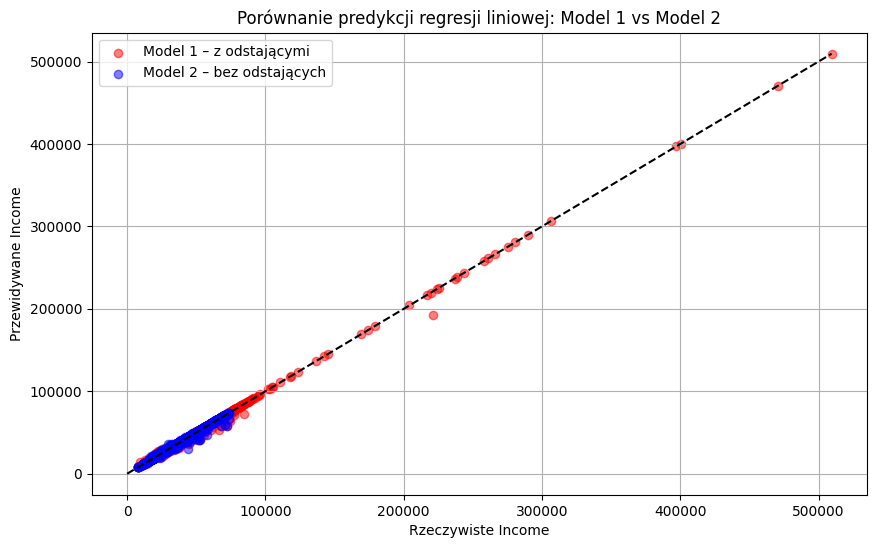

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(y_test_with, y_pred_with, color='red', alpha=0.5, label='Model 1 – z odstającymi')

plt.scatter(y_test_no, y_pred_no, color='blue', alpha=0.5, label='Model 2 – bez odstających')

# Linia predykcji
max_income = max(y_test_with.max(), y_test_no.max())
plt.plot([0, max_income], [0, max_income], color='black', linestyle='--')

plt.xlabel("Rzeczywiste Income")
plt.ylabel("Przewidywane Income")
plt.title("Porównanie predykcji regresji liniowej: Model 1 vs Model 2")
plt.legend()
plt.grid(True)
plt.show()

**Interpretacja wykresu**

Czerwone kropki - Model 1 z wartościami odstającymi: widać rozproszenie dla przeciętnych wartości, szczególnie w środkowym zakresie.
 Niebieskie kropki - Model 2 bez odstających: bardziej skupione wokół linii, przewidywania stabilniejsze.

## 7. Oddanie projektu w postaci pliku .html:

In [ ]:
# Funkcja generująca raport HTML dla regresji liniowej
def generate_html_report_regression(data_summary, model_metrics, numeric_cols, categorical_cols, standardized_preview, output_file="raport_projekt2.html"):

    plt.figure(figsize=(10,6))
    # Model 1 – z odstającymi
    plt.scatter(y_test_with, y_pred_with, color='red', alpha=0.5, label='Model 1 – z odstającymi')
    # Model 2 – bez
    plt.scatter(y_test_no, y_pred_no, color='blue', alpha=0.5, label='Model 2 – bez odstających')
    # linia
    max_income = max(y_test_with.max(), y_test_no.max())
    plt.plot([0,max_income],[0,max_income], color='black', linestyle='--')
    plt.xlabel("Rzeczywiste Income")
    plt.ylabel("Przewidywane Income")
    plt.title("Porównanie predykcji modeli regresji liniowej")
    plt.legend()
    plt.grid(True)
    # zapis wykresu
    plot_file = "wykres_income_regresja.png"
    plt.savefig(plot_file, bbox_inches='tight')
    plt.close()

    html_content = f"""
    <!DOCTYPE html>
    <html lang="pl">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Raport regresji liniowej</title>
        <style>
            body {{ font-family: Helvetica, sans-serif; margin: 20px; }}
            h1, h2 {{ color: #4169E1; }}
            table {{ width: 100%; border-collapse: collapse; margin-bottom: 20px; }}
            th, td {{ border: 1px solid #ddd; padding: 8px; text-align: center; }}
            th {{ background-color: #f4f4f4; }}
        </style>
    </head>
    <body>
        <h1>Raport projektu 2 – regresja liniowa</h1>
    """

    for section_name, df in data_summary.items():
        html_content += f"<h3>{section_name}</h3>"
        html_content += df.to_html(classes="dataframe", border=0, index=False)

    html_content += "<h3>Kolumny numeryczne</h3>"
    html_content += "<ul>" + "".join([f"<li>{col}</li>" for col in numeric_cols]) + "</ul>"
    html_content += "<h3>Kolumny kategoryczne</h3>"
    html_content += "<ul>" + "".join([f"<li>{col}</li>" for col in categorical_cols]) + "</ul>"

    html_content += "<h3>Dane po standaryzacji z wartościami odstającymi - zbiór treningowy (podgląd 5 wierszy)</h3>"
    html_content += standardized_preview.to_html(classes="dataframe", border=0, index=False)

    html_content += "<h3>Wykres predykcji vs rzeczywiste Income</h2>"
    html_content += f'<img src="{plot_file}" alt="Porównanie predykcji Income">'

    html_content += "<h3>Ocena modeli regresji liniowej</h2>"
    html_content += model_metrics.to_html(classes="dataframe", border=0, index=False)

    html_content += """
    <div class="wnioski">
        <h3>Wnioski z modeli regresji:</h3>
        <ul>
            <li>Model 1 z wartościami odstającymi:Bardzo wysokie R^2 (0.998537) pokazuje, że model dobrze dopasowuje się do całego zbioru, ale RMSE - 910 jest wyższe, co oznacza większe błędy przewidywań dla typowych dochodów.</li>
            <li>Model 2 bez wartości odstających: R^2 minimalnie niższe (0.996765), ale RMSE spada do 729, co oznacza stabilniejsze przewidywania dla większości populacji. Usunięcie wartości odstających poprawia jakość przewidywań w praktyce.</li>
            <li>Podsumowując, najbardziej praktyczny dla przewidywania typowych dochodów jest Model 2 bez outlierów</li>
        </ul>
    </div>
    """

    html_content += """
    </body>
    </html>
    """

    # zapis pliku
    with open(output_file, "w", encoding="utf-8") as file:
        file.write(html_content)
    print(f"Raport HTML zapisano jako: {output_file}")

data_summary = {"Podstawowe statystyki": data.describe().T.reset_index().rename(columns={"index":"Kolumna"})}

model_metrics = pd.DataFrame({
    "Model": ["Model 1 – z odstającymi", "Model 2 – bez odstających"],
    "R2": [r2_1, r2_2],
    "RMSE": [rmse_1, rmse_2]
})

numeric_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

standardized_preview = X_test_with_prep.head()

generate_html_report_regression(data_summary,model_metrics,numeric_cols,categorical_cols,standardized_preview,
                                output_file="raport_projekt2.html")

Raport HTML zapisano jako: raport_projekt2.html
